# 1. Data Processing:

In [1]:
#a)
import pandas as pd
import numpy as np
trainpath = "Downloads/train_data.csv"
testpath = "Downloads/test_data.csv"
train = pd.read_csv(trainpath)
test = pd.read_csv(testpath)
print("train shape", train.shape)
print("test shape", test.shape)

train shape (507, 148)
test shape (168, 148)


In [2]:
#b)
train.replace(["NaN", 'NaT'], np.nan, inplace = True)
train = train.dropna()
test.replace(["NaN", 'NaT'], np.nan, inplace = True)
test = test.dropna()

In [3]:
#c)
y_train = train["class"]
X_train = train.loc[:, train.columns != 'class']
y_test = test["class"]
X_test = test.loc[:, test.columns != 'class']

In [4]:
#d) 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Random Forest Classifier - Base Model:

In [5]:
#a) 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
#b)
rf_test_pred = rf.predict(X_test_scaled)

In [7]:
#c)
from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_pred))
print("Testing Classification Report")
print(metrics.classification_report(y_test, rf_test_pred))

Testing Confusion Matrix
[[14  0  0  0  0  0  0  0  0]
 [ 1 22  0  2  0  0  0  0  0]
 [ 0  2 13  0  0  0  0  0  0]
 [ 0  4  0 19  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  4]
 [ 1  0  1  0  0 13  0  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  5  2  0  0  6  0]
 [ 0  0  0  1  1  0  0  0 15]]
Testing Classification Report
              precision    recall  f1-score   support

    asphalt        0.74      1.00      0.85        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.70      0.83      0.76        23
      grass        0.89      0.86      0.88        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.83       168
   macro avg       0.87      0.82      0.83       168
weighted avg       0.86 

In [8]:
#d)
rf_train_pred = rf.predict(X_train_scaled)
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, rf_train_pred))
print("Training Classification Report")
print(metrics.classification_report(y_train, rf_train_pred))

Training Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]
Training Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.0

Question: Are there signs of overfitting? Why or why not?

Answer: There are signs of overfitting. The training accuracy, precision, and recall scores are extremely high (all perfect 1.0), which is an sign of overfitting. In addition, the testing precision, recall accuracy and accuracy scores are relatively lower (except for class shadow and class soil), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

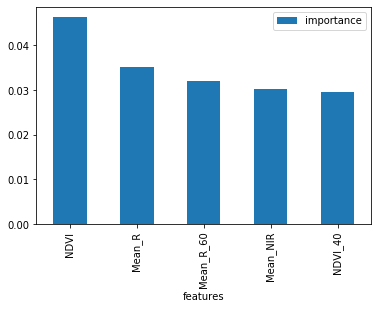

In [10]:
#e)
fi_rf = pd.DataFrame({'features': X_train.columns, 'importance': rf.feature_importances_})
fi_rf.sort_values('importance', ascending=False, inplace=True)
fi_rf.iloc[:5,].plot.bar(x='features', y='importance')

# 3. LinearSVM Classifier - Base Model:

In [11]:
#a)
from sklearn import svm
svm = svm.LinearSVC()
svm.fit(X_train_scaled, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
#b)
svm_test_pred = svm.predict(X_test_scaled)

In [13]:
#c)
from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, svm_test_pred))
print("Testing Classification Report")
print(metrics.classification_report(y_test, svm_test_pred))

Testing Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  1  1  1  0  0  0  0]
 [ 0  2 12  0  0  0  0  0  1]
 [ 1  6  0 15  0  0  0  0  1]
 [ 0  0  0  1 26  0  0  0  2]
 [ 1  0  1  0  0 13  0  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  4  0  1  3  0  0  6  0]
 [ 0  0  0  1  6  0  0  0 10]]
Testing Classification Report
              precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.65      0.88      0.75        25
        car        0.86      0.80      0.83        15
   concrete        0.79      0.65      0.71        23
      grass        0.72      0.90      0.80        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.88      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.71      0.59      0.65        17

    accuracy                           0.78       168
   macro avg       0.83      0.77      0.78       168
weighted avg       0.80 

In [14]:
#d)
svm_train_pred = svm.predict(X_train_scaled)
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, svm_train_pred))
print("Training Classification Report")
print(metrics.classification_report(y_train, svm_train_pred))

Training Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]
Training Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.9

Question: Are there signs of overfitting? Why or why not?

Answer:There are signs of overfitting. The training accuracy, precision, and recall scores are extremely high (all in high 90s% or perfect 100%), which is an sign of overfitting. In addition, the testing precision, recall accuracy and accuracy scores are relatively lower (except for class pool and class soil), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

# 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [17]:
#a)
from sklearn.model_selection import GridSearchCV
from sklearn import svm
para = np.arange(0.0, 10.2, 0.2)
para[0] = 0.01
parameters = {'C': para}
svm = svm.SVC(kernel='linear')
svm_linear = GridSearchCV(svm, parameters, cv=5, refit=True, n_jobs=-1, verbose=0, return_train_score=True)
svm_linear.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sc

In [18]:
#b)
print("SVM Grid Search best parameters",svm_linear.best_params_)
print("SVM Grid Search best estimator",svm_linear.best_estimator_)

SVM Grid Search best parameters {'C': 0.01}
SVM Grid Search best estimator SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [19]:
#c)
svm_linear_gs = svm_linear.best_estimator_
test_pred_svml = svm_linear_gs.predict(X_test_scaled)

In [20]:
#d)
from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, test_pred_svml))
print("Testing Classification Report")
print(metrics.classification_report(y_test, test_pred_svml))

Testing Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  3  0  5  2  0  0  4  0]
 [ 0  0  0  1  2  0  0  0 14]]
Testing Classification Report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

    accuracy                           0.82       168
   macro avg       0.85      0.81      0.82       168
weighted avg       0.83 

In [21]:
#e)
train_pred_svml = svm_linear_gs.predict(X_train_scaled)
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, train_pred_svml))
print("Training Classification Report")
print(metrics.classification_report(y_train, train_pred_svml))

Training Confusion Matrix
[[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]
Training Classification Report
              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.8

Question: Are there signs of overfitting? Why or why not?

Answer: There are slightly signs of overfitting. The training accuracy, precision, and recall scores are relatively high (almost in around 90%). However, the testing precision, recall accuracy and accuracy scores are relatively lower (in the low 80%), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

# 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

In [22]:
#a)
from sklearn import svm
svm_poly = svm.SVC(kernel='poly')
parameters = {
    'C': para,
    'degree': [2, 3, 4, 5, 6]
}
svm_poly = GridSearchCV(svm_poly, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1268 out of 1275 | elapsed:   27.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:   27.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]),
                         'degree': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', re

In [23]:
#b)
print("SVM Poly Grid Search best parameters",svm_poly.best_params_)
print("SVM Poly Grid Search best estimator",svm_poly.best_estimator_)

SVM Poly Grid Search best parameters {'C': 4.4, 'degree': 3}
SVM Poly Grid Search best estimator SVC(C=4.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [24]:
#c)
svm_poly_gs = svm_poly.best_estimator_
test_pred_svmp = svm_poly_gs.predict(X_test_scaled)

In [25]:
#d)
from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, test_pred_svmp))
print("Testing Classification Report")
print(metrics.classification_report(y_test, test_pred_svmp))

Testing Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  5  0 17  1  0  0  0  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 14  0  1]
 [ 0  3  0  5  6  0  0  0  0]
 [ 0  0  0  1  3  0  0  0 13]]
Testing Classification Report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.69      0.88      0.77        25
        car        1.00      0.73      0.85        15
   concrete        0.68      0.74      0.71        23
      grass        0.70      0.90      0.79        29
       pool        0.93      0.93      0.93        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.77       168
   macro avg       0.74      0.75      0.74       168
weighted avg       0.73 

In [32]:
#e)
train_pred_svmp = svm_poly_gs.predict(X_train_scaled)
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, train_pred_svmp))
print("Training Classification Report")
print(metrics.classification_report(y_train, train_pred_svmp))

Training Confusion Matrix
[[44  0  0  0  1  0  0  0  0]
 [ 0 95  0  1  1  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  9  0  0 11  0]
 [ 0  0  0  0  3  0  0  0 86]]
Training Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.83      0.98      0.90        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.55      0.71        20
       tree        0.99      0.97      0.98        89

    accuracy                           0.96       507
   macro avg       0.98      0.92      0.94       507
weighted avg       0.9

Question: Are there signs of overfitting? Why or why not?

Answer: There are slightly signs of overfitting. The training accuracy, precision, and recall scores are relatively high (almost all around high 90s%). However, the testing precision, recall accuracy and accuracy scores are significantly lower (except for class car), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

# 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

In [27]:
#a)
from sklearn import svm
svm_rbf = svm.SVC(kernel="rbf")
parameters = {
    'C': para,
    'gamma': [0.01,  0.1, 1, 10, 100]
}
svm_rbf = GridSearchCV(svm_rbf, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
svm_rbf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 1268 out of 1275 | elapsed:   48.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:   49.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]),
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_job

In [28]:
#b)
print("SVM RBF Grid Search best parameters",svm_rbf.best_params_)
print("SVM RBF Grid Search best estimator",svm_rbf.best_estimator_)

SVM RBF Grid Search best parameters {'C': 2.8000000000000003, 'gamma': 0.01}
SVM RBF Grid Search best estimator SVC(C=2.8000000000000003, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [29]:
#c)
svm_rbf_gs = svm_rbf.best_estimator_
test_pred_svmrbf = svm_rbf_gs.predict(X_test_scaled)

In [30]:
#d)
from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, test_pred_svmrbf))
print("Testing Classification Report")
print(metrics.classification_report(y_test, test_pred_svmrbf))

Testing Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 21  0  3  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  4  0 19  0  0  0  0  0]
 [ 0  1  0  0 26  0  0  0  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  2  0  4  3  0  0  5  0]
 [ 0  0  0  1  1  0  0  0 15]]
Testing Classification Report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.72      0.84      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.70      0.83      0.76        23
      grass        0.84      0.90      0.87        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        1.00      0.36      0.53        14
       tree        0.88      0.88      0.88        17

    accuracy                           0.85       168
   macro avg       0.88      0.84      0.84       168
weighted avg       0.86 

In [33]:
#e)
train_pred_svmrbf = svm_rbf_gs.predict(X_train_scaled)
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, train_pred_svmrbf))
print("Training Classification Report")
print(metrics.classification_report(y_train, train_pred_svmrbf))

Training Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 96  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0 19  0]
 [ 0  0  0  0  1  0  0  0 88]]
Training Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.9

Question: Are there signs of overfitting? Why or why not?

Answer: There are signs of overfitting. The training accuracy, precision, and recall scores are extremely high (all in high 90% or perfect 100%), which is an sign of overfitting. In addition, the testing precision, recall accuracy and accuracy scores are relatively lower (except for class car, class pool and class soil), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

# 7. Conceptual Questions:

a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

Answer: From the models run in steps 2-6, in terms of testing score, Random Forest Base Model (step 2) Support Vector Machine Classifier with RBF Kernel (step 6) and Linear Kernel (step 4) all have a relatively higher testing accruacy score (85%, 83% and 82%). 

However, Random Forest Classifier (step 2), Linear SVM Classifier - Base Model (step 3), Support Vector Machine Classifier with Polynomial Kernel (step 5) and RBF Kernel (step 6) all have very high training accuracy rate (all in high 90s% or perfect 100%), which are signs of overfitting. Plus, there significant difference between training and testing scores, which indicates that there is sign of overfitting. Support Vector Machine with Linear Kernel performs slightly better in terms of overfitting. It has a relatively lower training score and the difference between training and testing is the smallest among all the models (89% training and 82% testing). Therefore, Support Vector Machine Classifier with Linear Kernel with Grid Search performs the best based on the classification report. 

b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

Answer: Based on training and testing accruacy and overfit assessment, the Linear Kernel SVM performs the best in testing accuracy and is the only model that does not have obvious sign of overfitting. The best performing kernel signifies the true separator of the dataset. In this case, we can say that a linear function is the best approximation of the true separator of the dataset as compare to polynomial separators and radial basis function, which is an sign that our data can be separated by a linear transformation. The benefit of using polynomial or rbf kernel over a linear kernel is when the true separator line more complex than a linear line, and in this case, using a linear kernel might underfit the data. On contrast, the downside of using a polynomial or rbf kernel is when the true separator is linear but we are using polynomial or rbf kernel to fit our data. In this case, our model will be overfitted, which is the case for this homework in step 5-6. 

c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

Answer: The "C" parameter used in steps 4-6 to determine the total error tolerance. The error is calculated whenever a datapoint is misclassified, and the total error (number of misclassification) cannot exceed the value "C". This parameter is important when fitting a model because a high value of "C" means the model has a wider margin and can tolerate higher error. Therefore, if the "C" value is too high, the model might be underfitting as it gives too much tolerance to misclassification. On contrast, when the value of "C" is low, the model has narrow margin and gives low tolerance to misclassification. Therefore, if the "C" value is too low, the model might be overfitting.  


d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

Answer: In SVMs, we are trying to find the hyperplane for maximize the margin (best separate) between the different classes. If one feature has very large values, one dimension in this space will be very long and dominates the other dimensions (other features) when maximizing the margin distnace and determining the hyperplane. The hyperplane will be distored and focus only on separating the classes based on the dominate feature. Therefore, it is critical to scale all the features before performing a SVM so that all the features has the same influence on determining the hyperplane separator. 


e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

Answer: The kernel trick provides a solution to transform from low dimension to higher dimensional vectors in the transformed feature space, which allow us to separate data that is non-separable in low dimension. For instance, when the original data is in a line (1 dimension) and is non-separable by a dot (e.g. each pair of class 1 data point and class 2 data point follow each other sequentially), we can transform this data into a plane (2 dimensions) and use a line to separate the data.  
